# DAT210x - Programming with Python for DS

## Module5- Lab9

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.preprocessing as sp
matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [2]:
def drawLine(model, X_test, y_test, title, R2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [3]:
def drawPlane(model, X_test, y_test, title, R2):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression plane,
    # and displaying the R2 coefficient
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    
    # You might have passed in a DataFrame, a Series (slice),
    # an NDArray, or a Python List... so let's keep it simple:
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    
    # Set up a Grid. We could have predicted on the actual
    # col1, col2 values directly; but that would have generated
    # a mesh with WAY too fine a grid, which would have detracted
    # from the visualization
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    
    # Predict based on possible input values that span the domain
    # of the x and y inputs:
    z = model.predict(  np.c_[x.ravel(), y.ravel()]  )
    z = z.reshape(x.shape)

    
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

### The Assignment

Let's get started!

First, as is your habit, inspect your dataset in a text editor, or spread sheet application. The first thing you should notice is that the first column is both unique (the name of each) college, as well as unlabeled. This is a HINT that it must be the index column. If you do not indicate to Pandas that you already have an index column, it'll create one for you, which would be undesirable since you already have one.

Review the `.read_csv()` documentation and discern how to load up a dataframe while indicating which existing column is to be taken as an index. Then, load up the College dataset into a variable called `X`:

Read File with proper headers, some are missing. First row is the wrong column header, so drop it

In [4]:
X=pd.read_csv('College.csv',names=['College Name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],skiprows=1,index_col=None)

Check head, dtypes, shape and describe.

In [5]:
X.head()

,College Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
X.dtypes

College Name     object
Private          object
Apps              int64
Accept            int64
Enroll            int64
Top10perc         int64
Top25perc         int64
F.Undergrad       int64
P.Undergrad       int64
Outstate          int64
Room.Board        int64
Books             int64
Personal          int64
PhD               int64
Terminal          int64
S.F.Ratio       float64
perc.alumni       int64
Expend            int64
Grad.Rate         int64
dtype: object

In [7]:
X.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [8]:
X.shape

(777, 19)

Check for missing values

In [9]:
def num_missing(x):
    return sum(x.isnull())
print ("Missing values per column:")
print (X.apply(num_missing,axis=0))
print("\n")
print ("Missing values per row:")
print (X.apply(num_missing,axis=1)).head()


Missing values per column:
College Name    0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD             0
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64


Missing values per row:
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
747    0
748    0
749    0
750    0
751    0
752    0
753    0
754    0
755    0
756    0
757    0
758    0
759    0
760    0
761    0
762    0
763    0
764    0
765    0
766    0
767    0
768    0
769    0
770    0
771    0
772    0
773    0
774    0
775    0
776    0
Length: 777, dtype: int64


AttributeError: 'NoneType' object has no attribute 'head'

This line isn't necessary for your purposes; but we'd just like to show you an additional way to encode features directly. The `.map()` method is like `.apply()`, but instead of taking in a lambda / function, you simply provide a mapping of keys:values. If you decide to embark on the "Data Scientist Challenge", this line of code will save you the trouble of converting it through other means:

In [52]:
X.Private = X.Private.map({'Yes':1, 'No':0})

Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [12]:
from sklearn import linear_model
model = linear_model.LinearRegression()

The first relationship we're interested in is the number of accepted students, as a function of the amount charged for room and board.

Using indexing, create two slices (series). One will just store the room and board column, the other will store the accepted students column. Then use train_test_split to cut your data up into `X_train`, `X_test`, `y_train`, `y_test`, with a `test_size` of 30% and a random_state of 7.

In [10]:
rb=X[['Room.Board']]
accept=X[['Accept']]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(rb,accept,test_size=.3,random_state=7)

In [63]:
X_train.head()

,Room.Board
270,4090
455,4830
141,4180
543,3550
669,6582


Fit and score your model appropriately. Store the score in the `score` variable.

In [64]:
model=model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

-0.0026669864145500983

We'll take it from here, buddy:

Accept(Room&Board) R2: -0.0026669864145500983
Intercept(s):  [1340.61956519]


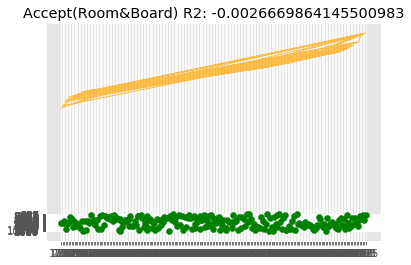

In [65]:
drawLine(model, X_test, y_test, "Accept(Room&Board)", score)

Duplicate the process above; this time, model the number of accepted students, as a function of the number of enrolled students per college.

In [69]:
enroll=X[['Enroll']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(enroll,accept,test_size=.3,random_state=7)
model=model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.8578204867356156

Accept(Enroll) R2: 0.8578204867356156
Intercept(s):  [151.72611242]


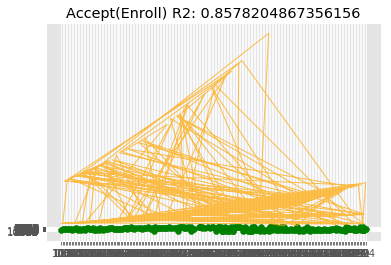

In [70]:
drawLine(model, X_test, y_test, "Accept(Enroll)", score)

Duplicate the process above; this time, model the number of accepted students, as as function of the number of failed undergraduate students per college.

In [71]:
fu=X[['F.Undergrad']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(fu,accept,test_size=.3,random_state=7)
model=model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.7779917973754006

Accept(F.Undergrad) R2: 0.7779917973754006
Intercept(s):  [380.9429105]


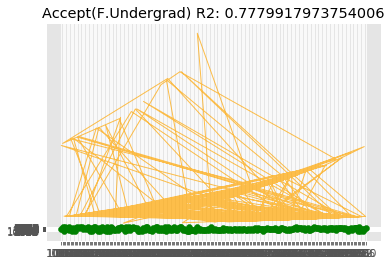

In [72]:
drawLine(model, X_test, y_test, "Accept(F.Undergrad)", score)

Duplicate the process above (almost). This time is going to be a bit more complicated. Instead of modeling one feature as a function of another, you will attempt to do multivariate linear regression to model one feature as a function of TWO other features.

Model the number of accepted students as a function of the amount charged for room and board _and_ the number of enrolled students. To do this, instead of creating a regular slice for a single-feature input, simply create a slice that contains both columns you wish to use as inputs. Your training labels will remain a single slice.

In [74]:
rb_enroll=X[['Room.Board','Enroll']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(rb_enroll,accept,test_size=.3,random_state=7)
model=model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.8764371774214047

Accept(Room&Board,Enroll) R2: 0.8764371774214047
Intercept(s):  [-1176.62848249]


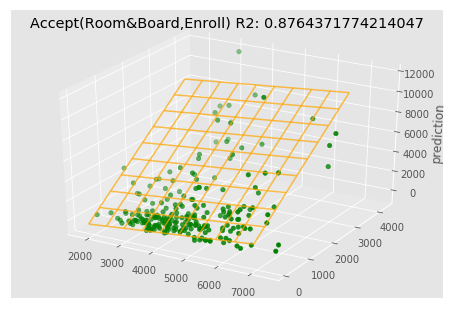

In [75]:
drawPlane(model, X_test, y_test, "Accept(Room&Board,Enroll)", score)

That concludes this assignment!

### Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the assignment without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.

### Data Scientist Challenge

You've experimented with a number of feature scaling techniques already, such as `MaxAbsScaler`, `MinMaxScaler`, `Normalizer`, `StandardScaler` and more from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing.

What happens if you apply scaling to your data before doing  linear regression? Would it alter the quality of your results? Do the scalers that work on a per-feature basis, such as `MinMaxScaler` behave differently that those that work on a multi-feature basis, such as normalize? And moreover, once your features have been scaled, you won't be able to use the resulting regression directly... unless you're able to `.inverse_transform()` the scaling. Do all of the SciKit-Learn scalers support that?

This is your time to shine and to show how much of an explorer you are: Dive deeper into uncharted lands, browse SciKit-Learn's documentation, scour Google, ask questions on Quora, Stack-Overflow, and the course message board, and see if you can discover something that will be of benefit to you in the future!

In [50]:
#T = sp.StandardScaler()
#T = sp.MinMaxScaler()
#T = sp.MaxAbsScaler()
#T =sp.Normalizer()
T =sp.RobustScaler()

In [51]:
#df_rb=T.fit_transform(df)
enroll=X[['Enroll']]
accept=X[['Accept']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(enroll,accept,test_size=.3,random_state=7)

In [52]:
X_train=T.fit_transform(X_train)
X_test=T.transform(X_test)

In [53]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [54]:
model=model.fit(X_train, y_train)
score_rb= model.score(X_test, y_test)
score_rb

0.8578204867356156

In [56]:
X_test

array([[-1.09939759e-01],
       [-2.13855422e-01],
       [-5.15060241e-01],
       [ 3.19277108e-01],
       [ 1.04367470e+00],
       [-2.16867470e-01],
       [ 2.21084337e+00],
       [-5.45180723e-01],
       [-1.49096386e-01],
       [ 3.05421687e+00],
       [ 6.02409639e-03],
       [-4.96987952e-02],
       [ 3.95481928e+00],
       [-3.97590361e-01],
       [-3.31325301e-02],
       [-5.27108434e-02],
       [-1.86746988e-01],
       [-4.81927711e-02],
       [-1.02409639e-01],
       [-2.54518072e-01],
       [-3.46385542e-01],
       [ 1.38554217e-01],
       [-4.51807229e-03],
       [ 9.03614458e-03],
       [-5.48192771e-01],
       [-5.42168675e-01],
       [-5.09036145e-01],
       [ 1.30572289e+00],
       [-9.78915663e-02],
       [-4.78915663e-01],
       [ 4.09638554e-01],
       [ 5.57228916e-01],
       [-9.63855422e-02],
       [-3.31325301e-02],
       [ 2.07831325e-01],
       [ 2.94879518e+00],
       [-2.50000000e-01],
       [-3.13253012e-01],
       [ 7.3

In [58]:
X_test=T.inverse_transform(X_test)

Accept(Enroll) R2: -0.021380176397801653
Intercept(s):  [1240.4808321]


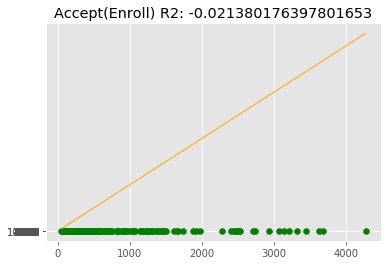

In [60]:
drawLine(model, X_test, y_test, "Accept(Enroll)", score_n)